# Part 7 -- Tuning Hyperparameters (Logistic Regression)

Using GridSearchCV to find the best parameters to optimize our model.

**Load lib codes**

In [1]:
from os import chdir
chdir('/home/jovyan/work/Analyzing_Unstructured_Data_for_Finance/Analyzing_Unstructured_Data_for_Finance/')

from lib import *
# suppress_warnings()

In [9]:
X_train = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.X_train.pickle')

In [10]:
y_train = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.y_train.pickle')

In [11]:
X_test = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.X_test.pickle')

In [12]:
y_test = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.y_test.pickle')

In [13]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression().fit(X_train, y_train)

In [15]:
print("Training set score: \t{}".format(lr.score(X_train, y_train)))
print("Test set score: \t{}".format(lr.score(X_test, y_test)))

Training set score: 	0.6428016697408019
Test set score: 	0.5601863836396583


In [16]:
params = {
    'C':np.logspace(-3,3,7),
    'penalty': ['l1', 'l2'],
}

In [17]:
lr_gs = GridSearchCV(LogisticRegression(), param_grid=params, n_jobs=-1, cv=StratifiedShuffleSplit(n_splits=5, random_state=42))

In [18]:
lr_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.1,
            train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [19]:
cv_results = pd.DataFrame(lr_gs.cv_results_)
cv_results[['mean_test_score', 'mean_train_score','params', 'rank_test_score']][(cv_results['rank_test_score']==1)].T

,5
mean_test_score,0.576023
mean_train_score,0.598307
params,"{'C': 0.1, 'penalty': 'l2'}"
rank_test_score,1


In [24]:
pd.DataFrame(lr_gs.predict(X_test)).sample(5)

,0
7313,0
7062,1
14207,0
6407,0
11208,0


In [25]:
pd.DataFrame(lr_gs.predict_proba(X_test)).sample(5)

,0,1
14292,0.624084,0.375916
5449,0.426742,0.573258
6242,0.487718,0.512282
6498,0.576103,0.423897
9967,0.615632,0.384368


# HOW DO I TIE THIS BACK TO WORDS? WHAT DO THESE MEAN?

In [ ]:
X_tfidf = joblib.load(../Analyzing_Unstructured_Data_for_Finance/data/)

In [ ]:
X_test[15442]

In [ ]:
tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.tfidf_transformer.pickle')

In [ ]:
tfidf.inverse_transform(X_test[15431])

In [38]:
lr_gs.best_estimator_.C

0.10000000000000001

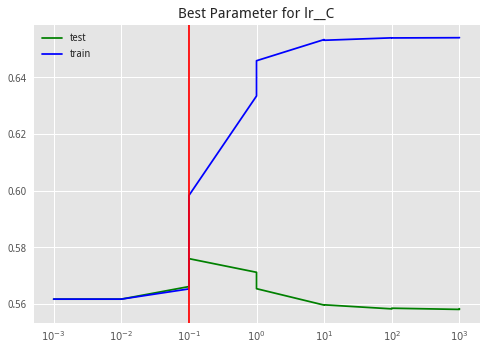

In [41]:
model_graph = pd.DataFrame(lr_gs.cv_results_)
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], c='g', label='test')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], c='b', label='train')
plt.axvline(lr_gs.best_estimator_.C, c='r')
plt.xscale("log")
plt.title("Best Parameter for lr__C")
plt.legend()